# 0. 라이브러리 및 데이터 불러오기


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn import metrics
from sklearn.datasets import load_digits

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist

import random

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)
print("tensorflow: ", tensorflow.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3
tensorflow:  2.10.0


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 1. Dropout

* 제프리 힌턴(Geoffrey Everest Hinton)이 고안
* 딥러닝 모델의 overfitting을 해결하는 방법
* 은닉층의 노드를 랜덤하게 꺼서 가중치를 업데이트 하지 않는 방법은 마치 랜덤 포레스트에서 과적합을 피하기 위해 랜덤 샘플링으로 다양한 트리를 만드는 것과 같은 효과로 다양한 딥러닝 모델을 학습시키는 것과 같다
* dropout은 batch size마다 바뀌고, `Dropout(0.3)`이면 해당 층의 30%의 노드를 끈다.(즉, 출력이 없다. 따라서 해당 노드와 관련된 파라미터는 업데이트 되지 않는다.)
    * `Dropout(0.0)`이면 모든 노드가 켜지는 것이고 
    * `Dropout(1.0)`이면 모든 노드를 끄는 것이므로(즉, 출력이 없어) 에러가 난다.

* rfc = RandomForestClassifier(oob_score=True, random_state=209) 
* acc: 0.9042

## MNIST DNN

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [6]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

index:  2315 image의 숫자:  3


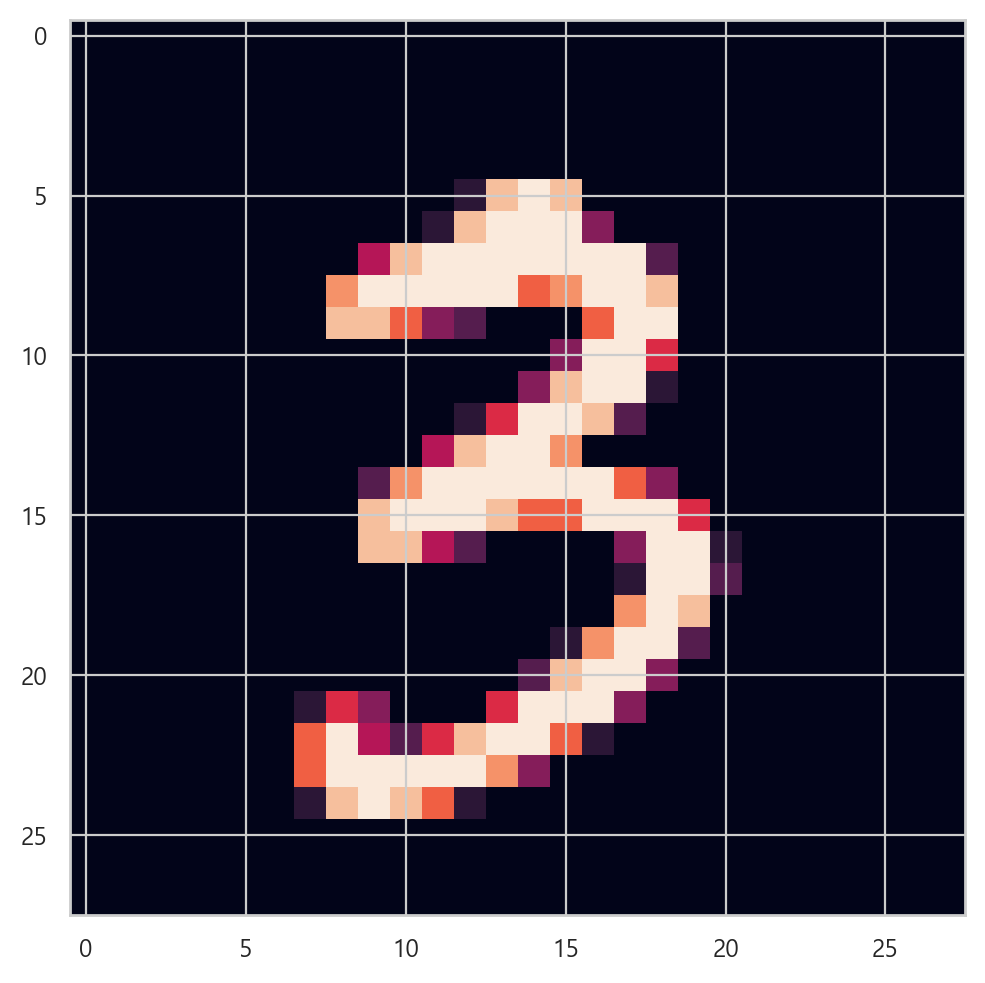

In [8]:
i = 2315
plt.imshow(x_train[i])
print("index: ", i, "image의 숫자: ", y_train[i]);

In [9]:
print(x_train.min(), x_train.max())

0 255


In [10]:
# min-max scaling
x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

In [11]:
## 데이터의 shape을 변경해 주자.
x_train_re = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test_re = np.reshape(x_test, (x_test.shape[0], 28*28))

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
## one-hot encoding으로 변경하자. 
y_train = to_categorical(y_train)

In [14]:
print("다층 신경망 input shape")
print("x_train: ", x_train_re.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test_re.shape)
print("y_test: ", y_test.shape)

다층 신경망 input shape
x_train:  (60000, 784)
y_train:  (60000, 10)
x_test:  (10000, 784)
y_test:  (10000,)


## 다층 신경망

In [15]:
print("다층 신경망 input shape")
print("x_train: ", x_train_re.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test_re.shape)
print("y_test: ", y_test.shape)

다층 신경망 input shape
x_train:  (60000, 784)
y_train:  (60000, 10)
x_test:  (10000, 784)
y_test:  (10000,)


In [16]:
random.seed(42)
# 입력노드 수 = feature 수
input_node = 28*28
# 출력노드 수
output_node = 10
# 은닉층 노드 수
first_hidden_node = 128
second_hidden_node = 64

#모델
model_mnist = Sequential(name = "mnist_classifier")
model_mnist.add(Dense(first_hidden_node, 
                       kernel_initializer='he_normal',
                       activation = "relu", 
                       input_shape=(input_node,) 
                       ))
model_mnist.add(Dense(second_hidden_node, 
                       kernel_initializer='he_normal',
                       activation = "relu"
                      ))
model_mnist.add(Dense(output_node, 
                       kernel_initializer='he_normal',
                       activation = "softmax"
                      ))

In [17]:
adam = Adam(learning_rate=0.001)

model_mnist.compile(loss='categorical_crossentropy',
                     optimizer = adam,
                     metrics = ['accuracy']
                   )

In [18]:
model_mnist_hist = model_mnist.fit(x_train_re, 
                                   y_train,
                                   epochs=10, 
                                   batch_size=200, 
                                   validation_split=0.2, 
                                   verbose = 0 #silent
                                  )

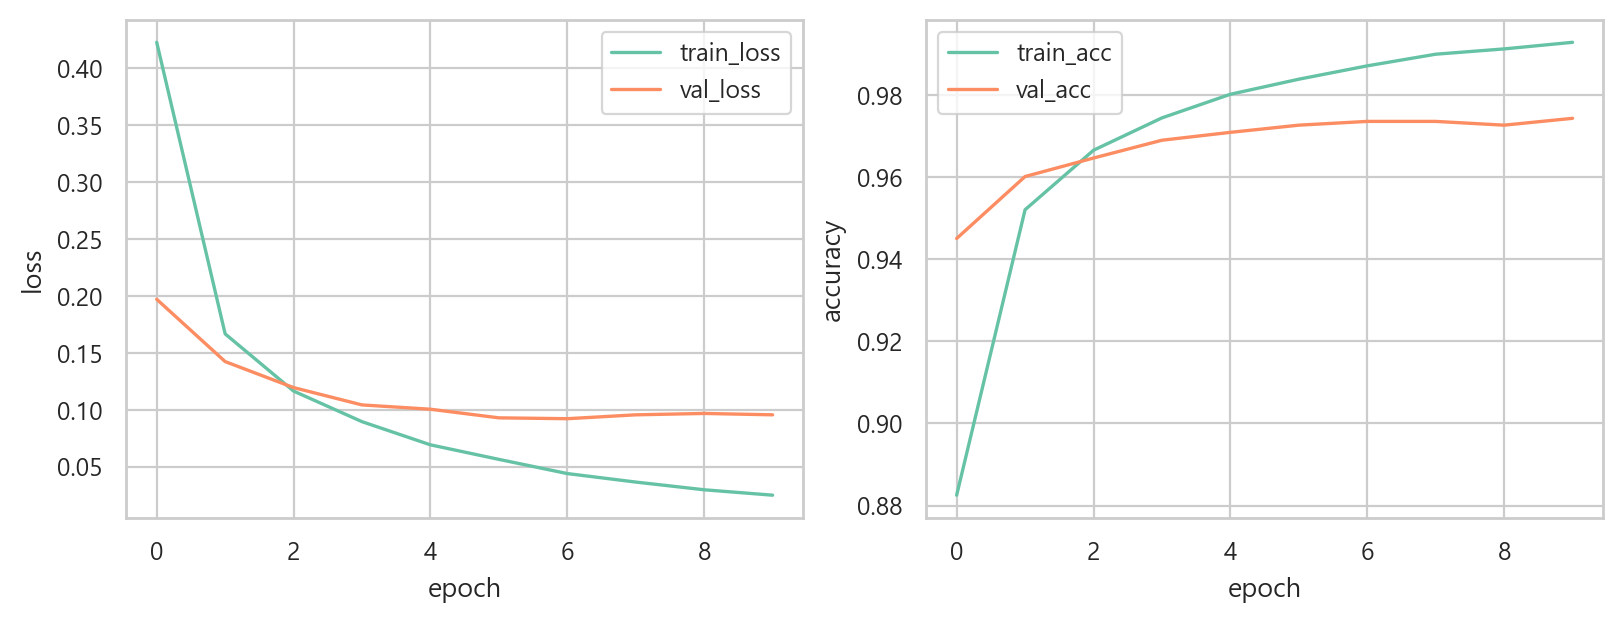

In [19]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(model_mnist_hist.history["loss"], label="train_loss")
ax_loss.plot(model_mnist_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch",
       ylabel = "loss")
ax_loss.legend()

ax_acc.plot(model_mnist_hist.history["accuracy"], label="train_acc")
ax_acc.plot(model_mnist_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch",
       ylabel = "accuracy")
ax_acc.legend();

In [32]:
np.argmax(model_mnist.predict(x_test_re)[0])

313/313 [==============================] - 1s 4ms/step


7

In [33]:
metrics.accuracy_score([np.argmax(i) for i in model_mnist.predict(x_test_re)], y_test)

313/313 [==============================] - 2s 5ms/step


0.9756

**Dropout 추가**

In [34]:
# Dropout 추가!

random.seed(42)
# 입력노드 수 = feature 수
input_node = 28*28
# 출력노드 수
output_node = 10
# 은닉층 노드 수
first_hidden_node = 128
second_hidden_node = 64

#모델
model_mnist_dropout = Sequential(name = "mnist_classifier_dropout")
model_mnist_dropout.add(Dense(first_hidden_node, 
                       kernel_initializer='he_normal',
                       activation = "relu", 
                       input_shape=(input_node,) 
                       ))
model_mnist_dropout.add(Dropout(0.3))
model_mnist_dropout.add(Dense(second_hidden_node, 
                       kernel_initializer='he_normal',
                       activation = "relu"
                      ))
model_mnist_dropout.add(Dropout(0.3))
model_mnist_dropout.add(Dense(output_node, 
                       kernel_initializer='he_normal',
                       activation = "softmax"
                      ))

In [35]:
model_mnist_dropout.summary()

Model: "mnist_classifier_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [36]:
adam = Adam(learning_rate=0.001)

model_mnist_dropout.compile(loss='categorical_crossentropy',
                     optimizer=adam,
                     metrics = ['accuracy'] #없으면?
                   )

In [37]:
model_mnist_dropout_hist = model_mnist_dropout.fit(x_train_re, 
                                   y_train,
                                   epochs=10, 
                                   batch_size=200, 
                                   validation_split=0.2, 
                                   #verbose = 0 #silent
                                  )

Epoch 1/10
240/240 [==============================] - 6s 16ms/step - loss: 0.6908 - accuracy: 0.7851 - val_loss: 0.2223 - val_accuracy: 0.9362
Epoch 2/10
240/240 [==============================] - 3s 11ms/step - loss: 0.3024 - accuracy: 0.9111 - val_loss: 0.1570 - val_accuracy: 0.9548
Epoch 3/10
240/240 [==============================] - 3s 12ms/step - loss: 0.2267 - accuracy: 0.9334 - val_loss: 0.1311 - val_accuracy: 0.9609
Epoch 4/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1857 - accuracy: 0.9452 - val_loss: 0.1162 - val_accuracy: 0.9653
Epoch 5/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1680 - accuracy: 0.9507 - val_loss: 0.1068 - val_accuracy: 0.9690
Epoch 6/10
240/240 [==============================] - 3s 11ms/step - loss: 0.1481 - accuracy: 0.9562 - val_loss: 0.0990 - val_accuracy: 0.9708
Epoch 7/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1345 - accuracy: 0.9608 - val_loss: 0.0985 - val_accuracy: 0.9699

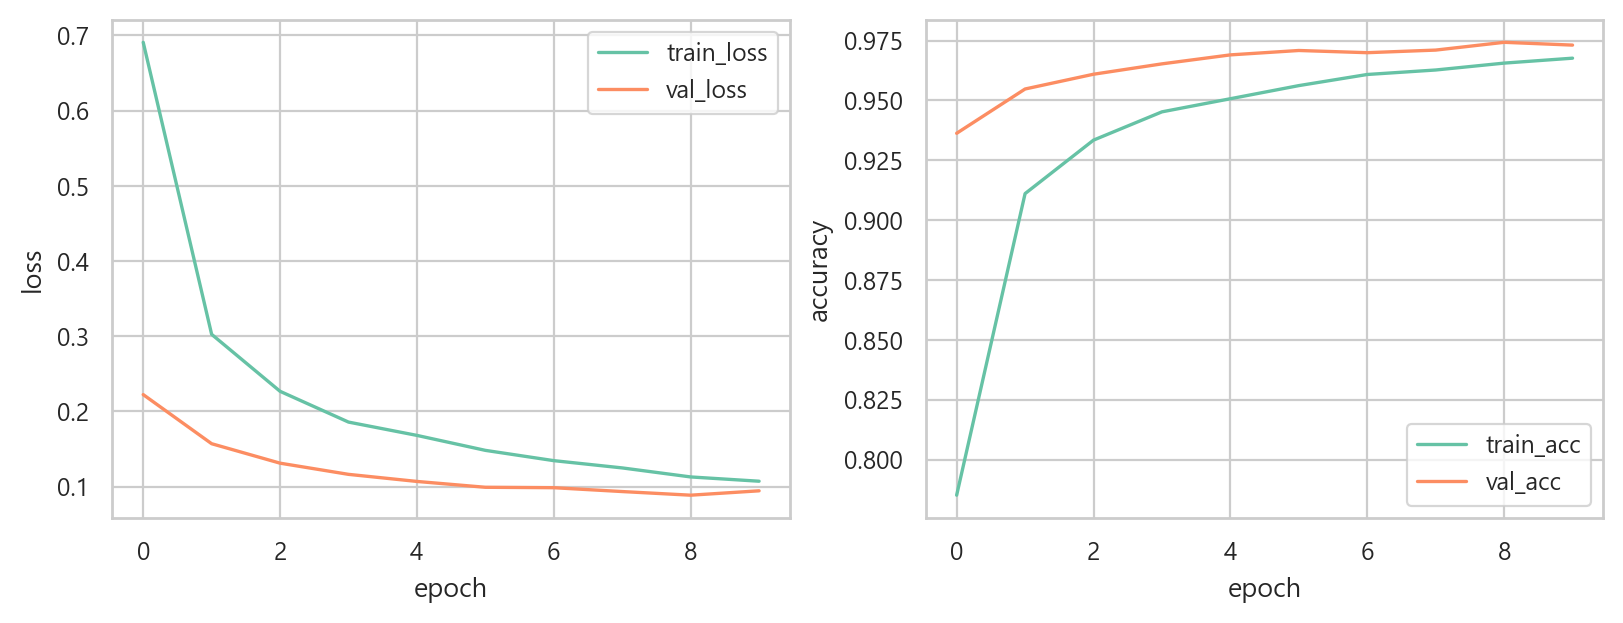

In [38]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(model_mnist_dropout_hist.history["loss"], label="train_loss")
ax_loss.plot(model_mnist_dropout_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch",
       ylabel = "loss")
ax_loss.legend()

ax_acc.plot(model_mnist_dropout_hist.history["accuracy"], label="train_acc")
ax_acc.plot(model_mnist_dropout_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch",
       ylabel = "accuracy")
ax_acc.legend();

In [39]:
metrics.accuracy_score([np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)], y_test)

313/313 [==============================] - 2s 5ms/step


0.9753

In [27]:
#model_mnist가 틀린 index
pred = [np.argmax(i) for i in model_mnist.predict(x_test_re)]
incor_indx = [i for i in range(len(y_test)) if y_test[i] != pred[i]]

#model_mnist_dropout이 틀린 index
pred_dropout = [np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)]
incor_dropout_indx = [i for i in range(len(y_test)) if y_test[i] != pred_dropout[i]]

# 두 모델이 공통으로 틀린 index
incor = list(set(incor_indx) & set(incor_dropout_indx))

313/313 [==============================] - 1s 4ms/step


In [28]:
np.random.choice(incor, 6)

array([2921, 2293, 2387, 2462, 9729, 2291])

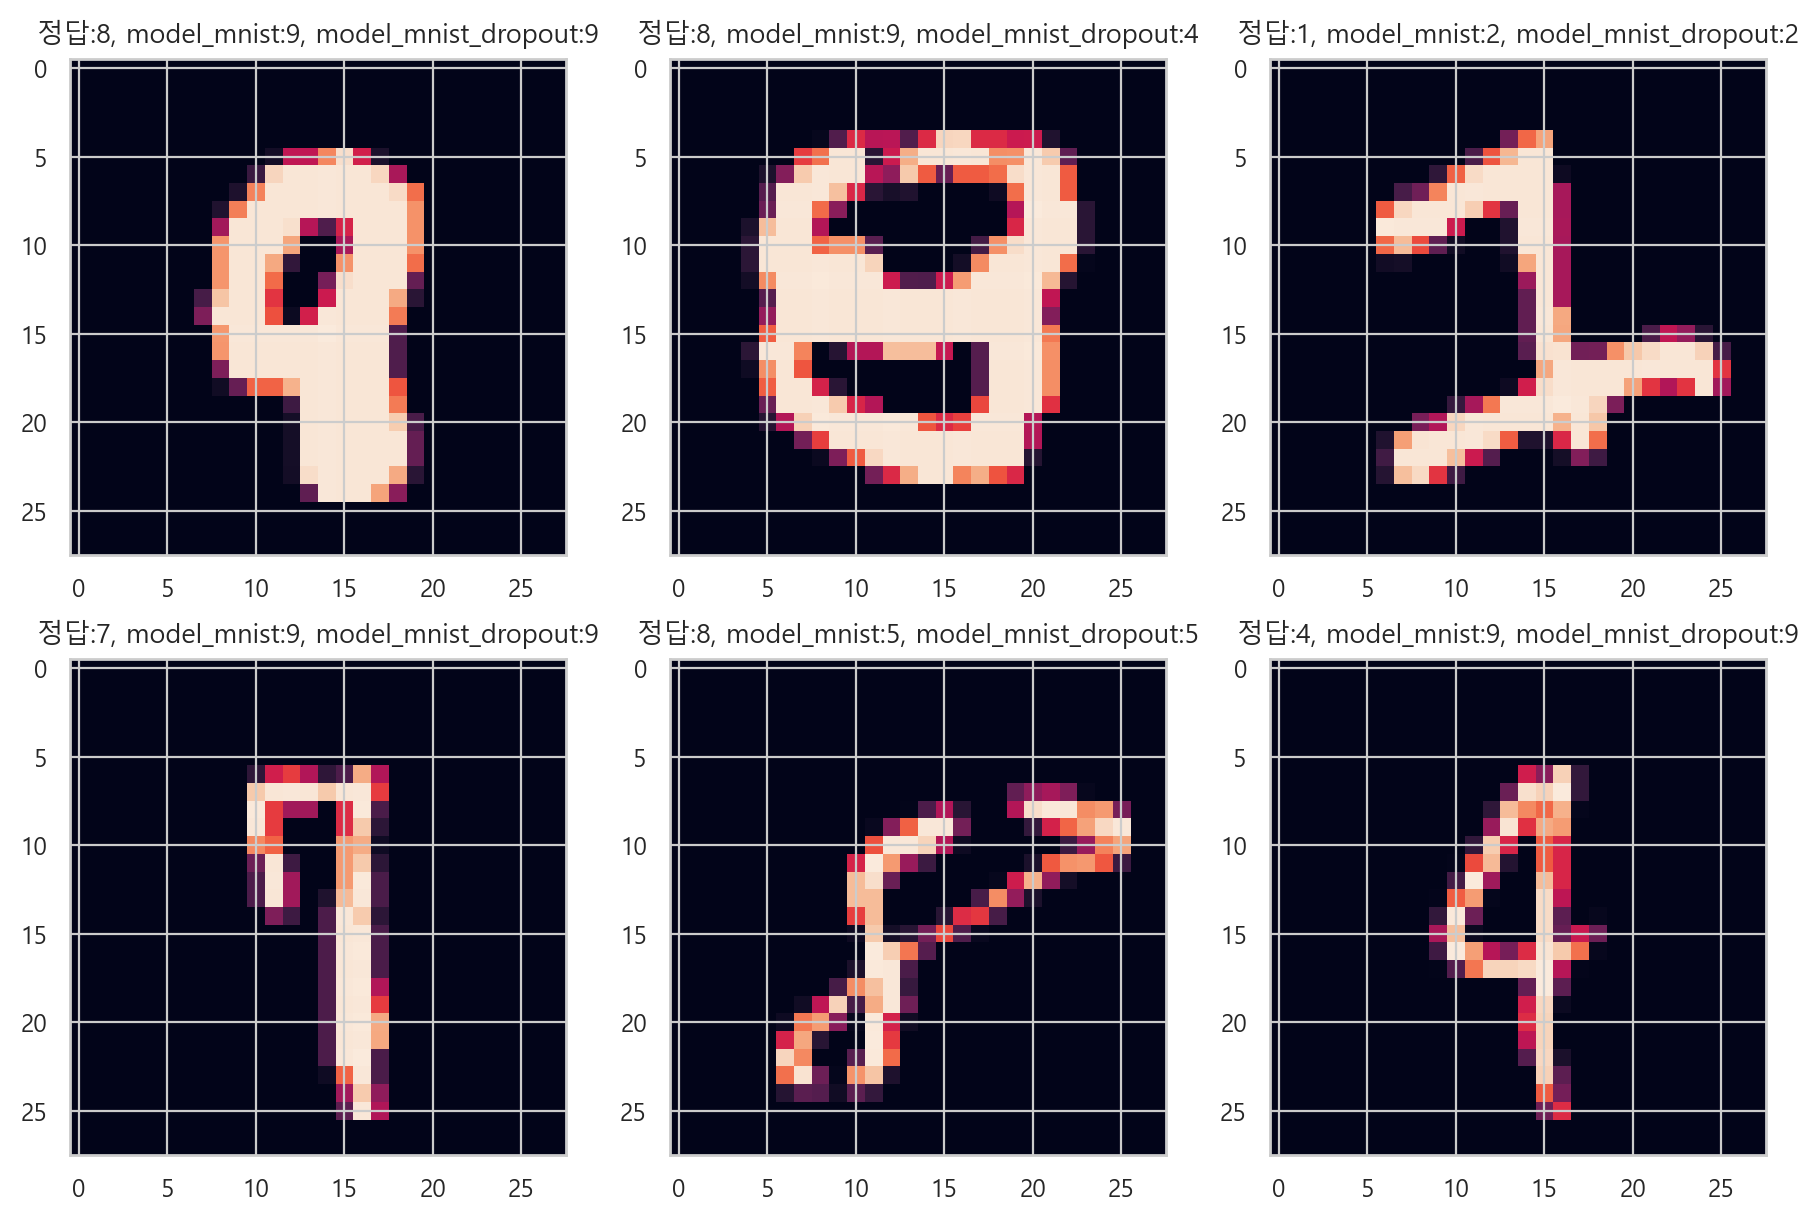

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(9,6))

for i, ax in zip(np.random.choice(incor, 6), axes.flat):
    ax.imshow(x_test[i])
    label = y_test[i]
    p_m = pred[i]
    p_d = pred_dropout[i]
    ax.set(title = f"정답:{label}, model_mnist:{p_m}, model_mnist_dropout:{p_d}")

In [47]:
# 저장
# model_mnist.save("../model/240603_mnist.h5")
# model_mnist_dropout.save("../model/240603_mnist_dropout.h5")

# 250603 과제

1. model_mnist, model_mnist_dropout이 어떤 숫자에서 많이 틀렸는지 bar plot(seaborn이라면 counter plot)으로 그리시오.

2. titanic에서 Survived를 분류하는 모델의 ROC curve를 그리시오. 